In [1]:
reset()

In [2]:
%display latex

In [3]:
M=Manifold(4,"M")

In [4]:
XS.<t,r,th,ph> = M.chart(r't r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\phi')

In [5]:
T = M.affine_connection('T',"T")

In [24]:
T[0,0,0] = 0
T[0,0,1] = function("A")(r)
T[0,1,0]= T[0,0,1]
T[0,1,1] = 0
T[0,2,2] =0
T[0,3,3] = 0
T[1,0,0] = function("B")(r)
T[1,0,1] = 0
T[1,1,1] = function("C")(r)
T[1,2,2] = function("F")(r)
T[1,3,3] = function("F")(r)*(sin(th))^2
T[2,0,2] = 0
T[2,0,3] = 0
T[2,1,2] = function("G")(r)
T[2,2,1]=T[2,1,2]
T[2,1,3] = 0
T[2,3,3] = -cos(th)*sin(th)
T[3,0,2] = 0
T[3,0,3] = 0
T[3,1,2] = 0
T[3,1,3] = function("G")(r)
T[3,3,1]=T[3,1,3]
T[3,2,3] = cos(th)/sin(th)
T[3,3,2]=T[3,2,3]

In [25]:
Riem= T.riemann()

In [26]:
Riem.display_comp(only_nonredundant=True)

X^t_r,t,r = -A(r)^2 + A(r)*C(r) - d(A)/dr 
X^t_th,t,th = A(r)*F(r) 
X^t_ph,t,ph = A(r)*F(r)*sin(th)^2 
X^r_t,t,r = A(r)*B(r) - B(r)*C(r) - d(B)/dr 
X^r_th,r,th = C(r)*F(r) - F(r)*G(r) + d(F)/dr 
X^r_ph,r,ph = (C(r)*F(r) - F(r)*G(r) + d(F)/dr)*sin(th)^2 
X^th_t,t,th = -B(r)*G(r) 
X^th_r,r,th = -C(r)*G(r) + G(r)^2 + d(G)/dr 
X^th_ph,th,ph = (F(r)*G(r) + 1)*sin(th)^2 
X^ph_t,t,ph = -B(r)*G(r) 
X^ph_r,r,ph = -C(r)*G(r) + G(r)^2 + d(G)/dr 
X^ph_th,th,ph = -F(r)*G(r) - 1

In [27]:
Ric = T.ricci()
Ric.display()

(-A(r)*B(r) + B(r)*C(r) + 2*B(r)*G(r) + d(B)/dr) dt⊗dt + (-A(r)^2 + A(r)*C(r) + 2*C(r)*G(r) - 2*G(r)^2 - d(A)/dr - 2*d(G)/dr) dr⊗dr + ((A(r) + C(r))*F(r) + d(F)/dr + 1) dth⊗dth + ((A(r) + C(r))*F(r) + d(F)/dr + 1)*sin(th)^2 dph⊗dph

In [28]:
g = M.lorentzian_metric('g')


In [29]:
g[0,0], g[1,1] =  -function("f")(r), 1/function("f")(r)
g[2,2], g[3,3] = r^2, (r*sin(th))^2

In [40]:
var("f")
g[0,0], g[1,1] =  f, 1/f
g[2,2], g[3,3] = r^2, (r*sin(th))^2

In [12]:
g[0,0], g[1,1] = -1, 1


In [41]:
g.display()

g = f dt⊗dt + 1/f dr⊗dr + r^2 dth⊗dth + r^2*sin(th)^2 dph⊗dph

In [42]:
dR=Riem.down(g)

In [43]:
uR=Riem.up(g)

In [44]:
Kr = uR.contract(0, 1, 2, 3, dR, 0, 1, 2, 3)
Kr.expr().factor()

2*(f^4*r^4*A(r)^4 - 2*f^4*r^4*A(r)^3*C(r) + f^4*r^4*A(r)^2*C(r)^2 + 2*f^4*r^4*C(r)^2*G(r)^2 - 4*f^4*r^4*C(r)*G(r)^3 + 2*f^4*r^4*G(r)^4 + 2*f^4*r^4*A(r)^2*diff(A(r), r) - 2*f^4*r^4*A(r)*C(r)*diff(A(r), r) - 4*f^4*r^4*C(r)*G(r)*diff(G(r), r) + 4*f^4*r^4*G(r)^2*diff(G(r), r) + f^4*r^4*diff(A(r), r)^2 + 2*f^4*r^4*diff(G(r), r)^2 + r^4*A(r)^2*B(r)^2 - 2*r^4*A(r)*B(r)^2*C(r) + r^4*B(r)^2*C(r)^2 + 2*r^4*B(r)^2*G(r)^2 - 2*r^4*A(r)*B(r)*diff(B(r), r) + 2*r^4*B(r)*C(r)*diff(B(r), r) + 2*f^2*A(r)^2*F(r)^2 + 2*f^2*C(r)^2*F(r)^2 - 4*f^2*C(r)*F(r)^2*G(r) + 4*f^2*F(r)^2*G(r)^2 + r^4*diff(B(r), r)^2 + 4*f^2*C(r)*F(r)*diff(F(r), r) - 4*f^2*F(r)*G(r)*diff(F(r), r) + 4*f^2*F(r)*G(r) + 2*f^2*diff(F(r), r)^2 + 2*f^2)/(f^2*r^4)

In [45]:
func = Kr.expr().factor()
func

2*(f^4*r^4*A(r)^4 - 2*f^4*r^4*A(r)^3*C(r) + f^4*r^4*A(r)^2*C(r)^2 + 2*f^4*r^4*C(r)^2*G(r)^2 - 4*f^4*r^4*C(r)*G(r)^3 + 2*f^4*r^4*G(r)^4 + 2*f^4*r^4*A(r)^2*diff(A(r), r) - 2*f^4*r^4*A(r)*C(r)*diff(A(r), r) - 4*f^4*r^4*C(r)*G(r)*diff(G(r), r) + 4*f^4*r^4*G(r)^2*diff(G(r), r) + f^4*r^4*diff(A(r), r)^2 + 2*f^4*r^4*diff(G(r), r)^2 + r^4*A(r)^2*B(r)^2 - 2*r^4*A(r)*B(r)^2*C(r) + r^4*B(r)^2*C(r)^2 + 2*r^4*B(r)^2*G(r)^2 - 2*r^4*A(r)*B(r)*diff(B(r), r) + 2*r^4*B(r)*C(r)*diff(B(r), r) + 2*f^2*A(r)^2*F(r)^2 + 2*f^2*C(r)^2*F(r)^2 - 4*f^2*C(r)*F(r)^2*G(r) + 4*f^2*F(r)^2*G(r)^2 + r^4*diff(B(r), r)^2 + 4*f^2*C(r)*F(r)*diff(F(r), r) - 4*f^2*F(r)*G(r)*diff(F(r), r) + 4*f^2*F(r)*G(r) + 2*f^2*diff(F(r), r)^2 + 2*f^2)/(f^2*r^4)

In [50]:
var("f")
value = func == 0
solve(value, f)


[f == -sqrt(-A(r)^2*F(r)^2/(A(r)^4 - 2*A(r)^3*C(r) + A(r)^2*C(r)^2 + 2*C(r)^2*G(r)^2 - 4*C(r)*G(r)^3 + 2*G(r)^4 + 2*A(r)^2*diff(A(r), r) - 2*A(r)*C(r)*diff(A(r), r) - 4*C(r)*G(r)*diff(G(r), r) + 4*G(r)^2*diff(G(r), r) + diff(A(r), r)^2 + 2*diff(G(r), r)^2) - C(r)^2*F(r)^2/(A(r)^4 - 2*A(r)^3*C(r) + A(r)^2*C(r)^2 + 2*C(r)^2*G(r)^2 - 4*C(r)*G(r)^3 + 2*G(r)^4 + 2*A(r)^2*diff(A(r), r) - 2*A(r)*C(r)*diff(A(r), r) - 4*C(r)*G(r)*diff(G(r), r) + 4*G(r)^2*diff(G(r), r) + diff(A(r), r)^2 + 2*diff(G(r), r)^2) + 2*C(r)*F(r)^2*G(r)/(A(r)^4 - 2*A(r)^3*C(r) + A(r)^2*C(r)^2 + 2*C(r)^2*G(r)^2 - 4*C(r)*G(r)^3 + 2*G(r)^4 + 2*A(r)^2*diff(A(r), r) - 2*A(r)*C(r)*diff(A(r), r) - 4*C(r)*G(r)*diff(G(r), r) + 4*G(r)^2*diff(G(r), r) + diff(A(r), r)^2 + 2*diff(G(r), r)^2) - 2*F(r)^2*G(r)^2/(A(r)^4 - 2*A(r)^3*C(r) + A(r)^2*C(r)^2 + 2*C(r)^2*G(r)^2 - 4*C(r)*G(r)^3 + 2*G(r)^4 + 2*A(r)^2*diff(A(r), r) - 2*A(r)*C(r)*diff(A(r), r) - 4*C(r)*G(r)*diff(G(r), r) + 4*G(r)^2*diff(G(r), r) + diff(A(r), r)^2 + 2*diff(G(r), r)^2) - 2*C(r)*F(r)*diff(F(r), r)/(A(r)^4 - 2*A(r)^3*C(r) + A(r)^2*C(r)^2 + 2*C(r)^2*G(r)^2 - 4*C(r)*G(r)^3 + 2*G(r)^4 + 2*A(r)^2*diff(A(r), r) - 2*A(r)*C(r)*diff(A(r), r) - 4*C(r)*G(r)*diff(G(r), r) + 4*G(r)^2*diff(G(r), r) + diff(A(r), r)^2 + 2*diff(G(r), r)^2) + 2*F(r)*G(r)*diff(F(r), r)/(A(r)^4 - 2*A(r)^3*C(r) + A(r)^2*C(r)^2 + 2*C(r)^2*G(r)^2 - 4*C(r)*G(r)^3 + 2*G(r)^4 + 2*A(r)^2*diff(A(r), r) - 2*A(r)*C(r)*diff(A(r), r) - 4*C(r)*G(r)*diff(G(r), r) + 4*G(r)^2*diff(G(r), r) + diff(A(r), r)^2 + 2*diff(G(r), r)^2) - 2*F(r)*G(r)/(A(r)^4 - 2*A(r)^3*C(r) + A(r)^2*C(r)^2 + 2*C(r)^2*G(r)^2 - 4*C(r)*G(r)^3 + 2*G(r)^4 + 2*A(r)^2*diff(A(r), r) - 2*A(r)*C(r)*diff(A(r), r) - 4*C(r)*G(r)*diff(G(r), r) + 4*G(r)^2*diff(G(r), r) + diff(A(r), r)^2 + 2*diff(G(r), r)^2) - diff(F(r), r)^2/(A(r)^4 - 2*A(r)^3*C(r) + A(r)^2*C(r)^2 + 2*C(r)^2*G(r)^2 - 4*C(r)*G(r)^3 + 2*G(r)^4 + 2*A(r)^2*diff(A(r), r) - 2*A(r)*C(r)*diff(A(r), r) - 4*C(r)*G(r)*diff(G(r), r) + 4*G(r)^2*diff(G(r), r) + diff(A(r), r)^2 + 2*diff(G(r), r)^2) + sqrt(-r^8*A(r)^6*B(r)^2 + 4*r^8*A(r)^5*B(r)^2*C(r) - 6*r^8*A(r)^4*B(r)^2*C(r)^2 + 4*r^8*A(r)^3*B(r)^2*C(r)^3 - r^8*A(r)^2*B(r)^2*C(r)^4 - 2*r^8*A(r)^4*B(r)^2*G(r)^2 + 4*r^8*A(r)^3*B(r)^2*C(r)*G(r)^2 - 4*r^8*A(r)^2*B(r)^2*C(r)^2*G(r)^2 + 4*r^8*A(r)*B(r)^2*C(r)^3*G(r)^2 - 2*r^8*B(r)^2*C(r)^4*G(r)^2 + 4*r^8*A(r)^2*B(r)^2*C(r)*G(r)^3 - 8*r^8*A(r)*B(r)^2*C(r)^2*G(r)^3 + 4*r^8*B(r)^2*C(r)^3*G(r)^3 - 2*r^8*A(r)^2*B(r)^2*G(r)^4 + 4*r^8*A(r)*B(r)^2*C(r)*G(r)^4 - 6*r^8*B(r)^2*C(r)^2*G(r)^4 + 8*r^8*B(r)^2*C(r)*G(r)^5 - 4*r^8*B(r)^2*G(r)^6 - 2*r^8*A(r)^4*B(r)^2*diff(A(r), r) + 6*r^8*A(r)^3*B(r)^2*C(r)*diff(A(r), r) - 6*r^8*A(r)^2*B(r)^2*C(r)^2*diff(A(r), r) + 2*r^8*A(r)*B(r)^2*C(r)^3*diff(A(r), r) - 4*r^8*A(r)^2*B(r)^2*G(r)^2*diff(A(r), r) + 4*r^8*A(r)*B(r)^2*C(r)*G(r)^2*diff(A(r), r) + 2*r^8*A(r)^5*B(r)*diff(B(r), r) - 6*r^8*A(r)^4*B(r)*C(r)*diff(B(r), r) + 6*r^8*A(r)^3*B(r)*C(r)^2*diff(B(r), r) - 2*r^8*A(r)^2*B(r)*C(r)^3*diff(B(r), r) + 4*r^8*A(r)*B(r)*C(r)^2*G(r)^2*diff(B(r), r) - 4*r^8*B(r)*C(r)^3*G(r)^2*diff(B(r), r) - 8*r^8*A(r)*B(r)*C(r)*G(r)^3*diff(B(r), r) + 8*r^8*B(r)*C(r)^2*G(r)^3*diff(B(r), r) + 4*r^8*A(r)*B(r)*G(r)^4*diff(B(r), r) - 4*r^8*B(r)*C(r)*G(r)^4*diff(B(r), r) + 4*r^8*A(r)^2*B(r)^2*C(r)*G(r)*diff(G(r), r) - 8*r^8*A(r)*B(r)^2*C(r)^2*G(r)*diff(G(r), r) + 4*r^8*B(r)^2*C(r)^3*G(r)*diff(G(r), r) - 4*r^8*A(r)^2*B(r)^2*G(r)^2*diff(G(r), r) + 8*r^8*A(r)*B(r)^2*C(r)*G(r)^2*diff(G(r), r) - 4*r^8*B(r)^2*C(r)^2*G(r)^2*diff(G(r), r) + 8*r^8*B(r)^2*C(r)*G(r)^3*diff(G(r), r) - 8*r^8*B(r)^2*G(r)^4*diff(G(r), r) - r^8*A(r)^2*B(r)^2*diff(A(r), r)^2 + 2*r^8*A(r)*B(r)^2*C(r)*diff(A(r), r)^2 - r^8*B(r)^2*C(r)^2*diff(A(r), r)^2 - 2*r^8*B(r)^2*G(r)^2*diff(A(r), r)^2 + 4*r^8*A(r)^3*B(r)*diff(A(r), r)*diff(B(r), r) - 8*r^8*A(r)^2*B(r)*C(r)*diff(A(r), r)*diff(B(r), r) + 4*r^8*A(r)*B(r)*C(r)^2*diff(A(r), r)*diff(B(r), r) - r^8*A(r)^4*diff(B(r), r)^2 + 2*r^8*A(r)^3*C(r)*diff(B(r), r)^2 - r^8*A(r)^2*C(r)^2*diff(B(r), r)^2 - 2*r^8*C(r)^2*G(r)^2*diff(B(r), r)^2 + 4*r^8*C(r)*

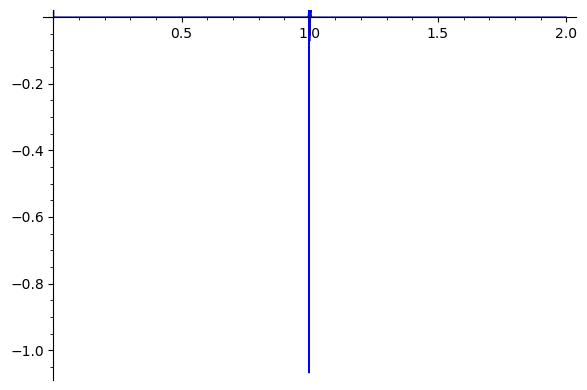

In [81]:
plot(func, r, 0,2, ymax=1)

In [1]:
fr = (3^(1/2)*k2*r^2)/(2^(1/2)*k1^3-2*2^(1/2)*k1^2 * r +2^(1/2)*k1*r^2)
fr

NameError: name 'k2' is not defined

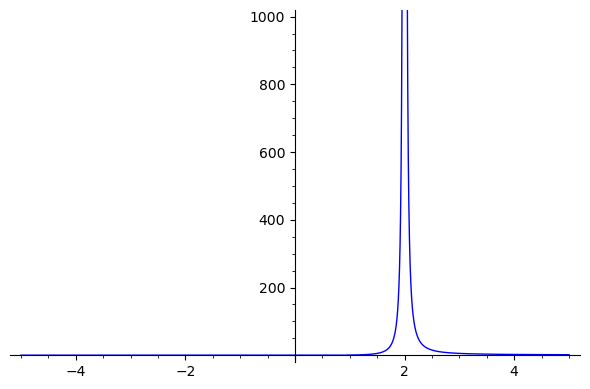

In [130]:
plot(fr.subs(k2=1).subs(k1=2), r, -5,5, ymax=1000)

In [ ]:
-((2 a[r])/r) + 4 a[r]^2 + 4 r a[r]^3 + 2 Derivative[1][a][r] + 
  6 r a[r] Derivative[1][a][r] + r (a^\[Prime]\[Prime])[r] == 0
    
var("")
value = (2*k1^6 -8* k1^5 * r +12*k1^4 *r^2 -8*k1^3 * r^3 +2*k1^2 * r^4 )* F^2 +3* k2^2 * r^4 == 0
solve(value, F)


In [37]:
r = var('r')
a = function('a')(r)
de = ((-2*a)/r)+4*a^2+4*r*a^3+2*diff(a,r)+6*r*a*diff(a,r)+r*diff(a,r,2)== 0
Y=desolve(de, a, algorithm="fricas");Y

TypeError: unable to start fricas because the command 'fricas -nosman' failed: The command was not found or was not executable: fricas.

In order to use the FriCAS interface you need to have FriCAS installed.
You can either run 'sage -i fricas' to install FriCAS as an optional
package within SageMath, or install FriCAS separately, see
http://fricas.sourceforge.net.


In [54]:
x=var('x')
y=function('y')(x)
de = x^3*diff(y, x, 3) + x^2*diff(y, x, 2) - 2*x*diff(y, x) + 2*y - 2*x^4
Y = desolve(de, y, algorithm="fricas"); Y  

ilt(-4*(2*g58150^7*D[2, 2](laplace)(y(x), x, g58150) + 3*g58150^6*D[2](laplace)(y(x), x, g58150) + 12)/g58150^8, g58150, x)